

<center> <h1> <b><span style="color:brown"> 
Predictive Analysis <br><br></h1>


## Import the relevant libraries



### information about the dataset: 

This data is derived from the marketing campaigns of a Portuguese banking institution. The primary objective is to forecast whether a client will opt for a term deposit (referred to as variable "y"). It is important to note that the interest rate pertains to the 3-month interest rate between banks, and the duration signifies the time elapsed since the most recent contact with a particular consumer. The preceding variable indicates whether the last marketing campaign proved successful with that customer. March and May are binary variables that signify when the call was made to the specific customer, and the "credit" variable indicates whether the customer possesses sufficient credit to avoid default. In our analysis, we utilize the dependent variable "duration" to predict "y."


### importing required libraries

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import statsmodels.api as sm

### Load the Dataset:

#### Reads the dataset from a CSV file named "Bank_data.csv" using pandas.
#### Drops the "Unnamed: 0" column, which is likely an index column.

In [2]:
# Load the dataset
data = pd.read_csv("dataset.csv")
data = data.drop(columns=['Unnamed: 0'])
data

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4.856,0.0,1.0,0.0,0.0,157.0,no
...,...,...,...,...,...,...,...
513,1.334,0.0,1.0,0.0,0.0,204.0,no
514,0.861,0.0,0.0,2.0,1.0,806.0,yes
515,0.879,0.0,0.0,0.0,0.0,290.0,no
516,0.877,0.0,0.0,5.0,1.0,473.0,yes


### Explanation:

The following code helps change words 'yes' and 'no' into numbers, which is something we often do in machine learning when we're working with problems where we need to classify things into two groups.

In our dataset and for our problem, we're trying to predict if a person signs up for a service or not. Originally, we had 'yes' and 'no' to show this. But many machine learning methods, including the one we're using here (logistic regression), need numbers to work. So, we turn 'yes' into 1 and 'no' into 0 to make it easier for the model to understand and make predictions. This way, '1' means "yes, they signed up," and '0' means "no, they didn't sign up."

* Model Compatibility: Machine learning models, including logistic regression, require numerical input for training and prediction. Categorical values like 'yes' and 'no' need to be converted into numerical form for the model to understand and learn from them.

* Binary Classification: In binary classification problems, it's common to map one class to 0 and the other to 1. In our case, we are mapping 'no' to 0 and 'yes' to 1, which means 'yes' indicates the positive class (subscribed) and 'no' indicates the negative class (not subscribed).

* Consistency: By mapping 'yes' to 1 and 'no' to 0, we establish a consistent encoding that is understandable by the model. This ensures that the model treats 'yes' as a higher numerical value and 'no' as a lower value, which reflects the nature of the target variable.

After this transformation, our target variable 'y' is suitable for use in logistic regression and other machine learning models that require binary classification. The model will use this encoded variable to make predictions and calculate relevant metrics like accuracy, precision, recall, and F1-score.

In [3]:
# Use the map function to change 'yes' values to 1 and 'no' values to 0
data['y'] = data['y'].map({"yes": 1, "no": 0})
data

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0
...,...,...,...,...,...,...,...
513,1.334,0.0,1.0,0.0,0.0,204.0,0
514,0.861,0.0,0.0,2.0,1.0,806.0,1
515,0.879,0.0,0.0,0.0,0.0,290.0,0
516,0.877,0.0,0.0,5.0,1.0,473.0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   interest_rate  518 non-null    float64
 1   credit         518 non-null    float64
 2   march          518 non-null    float64
 3   may            518 non-null    float64
 4   previous       518 non-null    float64
 5   duration       518 non-null    float64
 6   y              518 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 28.5 KB


### Checking the missing values

In [5]:
miss = data.isna()
miss.sum()

interest_rate    0
credit           0
march            0
may              0
previous         0
duration         0
y                0
dtype: int64

### Feature Selection:
Declare the dependent and independent variables
Selects the 'duration' column as the independent variable (predictor) and assigns it to x.
Selects the 'y' column as the dependent variable (target) and assigns it to y. In this case, we're trying to predict whether a client subscribes based on the duration of the last contact.

Use 'duration' as the independent variable.

In [6]:
# Use 'duration' as the independent variable
x = data[["duration"]]
y = data["y"]

### Data Split: we should split our data into training and testing sets to evaluate the model's performance. we can use the train_test_split function for this purpose.

The "Train-Test Split" is like a crucial dividing step in machine learning, and it helps us understand its parts:

Splitting the data: We take all our data and split it into two groups - one for teaching the model (the training set) and the other to check how well the model learned (the testing set).

Dividing the data: Each of these groups is further divided into two parts:
* The part that contains the information we use to teach the model (features), which we call x_train for training data and x_test for testing data.
* The part that has the answers we want the model to predict (target), which we call y_train for training and y_test for testing.

Reserving a piece for testing: We decide to keep 20% of our data for testing, and the rest, 80%, is used for teaching our model. This 20% is like a sample to check how well the model is doing.

Ensuring reproducibility: To make sure our results are consistent every time we run the code, we set a random seed (called random_state). It's like using a fixed starting point for randomness, so we get the same split every time.

So, in a nutshell, we split our data into parts: one to teach the model and the other to check its performance. This helps us measure how well the model has learned and is a standard practice in machine learning.



In [7]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


### Create a logistic regression model

Creates a logistic regression model using LogisticRegression from scikit-learn:

In machine learning, a model is like a mathematical tool that helps us make predictions based on data. A logistic regression model is one such tool used for classification problems, like determining if a customer will buy a product (yes/no).

We're using the LogisticRegression function from a popular Python library called scikit-learn to build this model. Scikit-learn provides tools to create, train, and evaluate machine learning models.

The model uses the 'liblinear' solver and a random state for reproducibility:

A "solver" is a method that the logistic regression model uses to find the best fit for the data. 'liblinear' is one of the solver methods. It's chosen based on the characteristics of your dataset, and different solvers are suitable for different types of data.

"Random state" is like setting a starting point for randomness. This means if you run the model multiple times with the same random state, you will get the same results. It's useful for making your experiments reproducible and consistent.
Fits (trains) the model on the training data using model.fit(x_train, y_train):

To teach the model how to make predictions, we use the training data. The model.fit(x_train, y_train) command is like a teacher instructing the model.

* x_train contains the information (features) that we use to make predictions. For example, it could be data about customers' past behavior.
* y_train contains the correct answers or outcomes. In this case, it's whether a customer bought a product (1 for yes, 0 for no).

The model adjusts its settings while looking at the training data. It's like a teacher learning from the past to make better predictions about the future.
In a nutshell, this part of the code creates a logistic regression model, chooses settings for how it learns from data, and then trains it using the training data. Once the model is trained, it can make predictions about new, unseen data.

In [8]:
# Create a logistic regression model
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x_train.values, y_train.values)

LogisticRegression(random_state=0, solver='liblinear')

### Intercept and coefficient of our model

* Print the Intercept:

The model.intercept_ represents the intercept term of the logistic regression model. In simple words, it's like a starting point or baseline value.

When we make predictions with a logistic regression model, this value (the intercept) is added to the calculations. It affects the prediction but doesn't depend on any specific input feature. It's a constant value that helps shift the prediction up or down.

Printing "Intercept:" followed by model.intercept_ is a way to see what this baseline value is.


* Print the Coefficient:

The model.coef_ represents the coefficient(s) of the logistic regression model. Coefficients are like weights or factors that are assigned to each input feature (independent variable) in our data.

These coefficients tell us how much each feature influences the model's predictions. If a feature has a positive coefficient, it means that an increase in that feature's value makes it more likely for the model to predict the positive outcome. If it has a negative coefficient, it means the opposite.

Printing "Coefficient:" followed by model.coef_ is a way to see the specific weights assigned to each feature in our data. It helps us understand the impact of each feature on the prediction.

In summary, the code is printing the intercept (baseline value) and the coefficients (weights) of the logistic regression model. These values give us insights into how the model makes predictions and how much each feature influences those predictions. It's a way to understand the inner workings of the model and its decision-making process.

In [9]:
# Print the intercept and coefficient of the model
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

Intercept: [-1.60687383]
Coefficient: [[0.00455103]]


### Make Predictions on the Test Set:

The following code is all about using the trained logistic regression model to make predictions on data it hasn't seen before. This new data is called the "test set."

Think of it like a robot who has learned from a textbook (the training data) and is now going to answer questions (make predictions) based on a new set of problems (the test data).

predictions = model.predict(x_test.values):

model.predict() is like the robot providing answers. It takes the test data (features or input) as x_test.values and uses the trained model to predict the outcomes.

The predictions are like the robot's answers to questions. In this case, the model is predicting whether each customer in the test set will subscribe to a term deposit (yes or no) based on the duration of the last contact.

These predictions will be compared to the actual outcomes in the test set to see how well the model is doing at making accurate predictions.

So, this part of the code is all about using the trained model to guess what's going to happen with new data, and these guesses are stored in the predictions variable for later evaluation.


In [10]:
# Make predictions on the test set
predictions = model.predict(x_test.values)

### Calculate the Accuracy of the Model:

the following code is all about figuring out how good the model is at making correct predictions. We want to know if it's accurate or not.

accuracy = model.score(x_test.values, y_test.values):

model.score() is like a tool that checks how many of the model's predictions match the actual answers (the test data).

It's as if we're grading the model's answers. We compare the predictions (what the model thinks) in x_test.values to the real outcomes (the correct answers) in y_test.values.

The result, stored in the accuracy variable, tells us the percentage of correct answers. A higher accuracy means the model is better at making predictions.

Print "Model Accuracy:" followed by accuracy:

This line simply displays the accuracy as a number. For example, if the accuracy is 0.67, it means the model got 67% of the answers right.

In a nutshell, this code helps us understand how well the model is doing by measuring the percentage of correct predictions. The accuracy score tells us how accurate the model's guesses are when compared to the real answers.


In [11]:
# Calculate the accuracy of the model
accuracy = model.score(x_test.values, y_test.values)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.6730769230769231


### Print the Classification Report and Confusion Matrix:
This part of the code is all about assessing how well the model is performing in more detail. It provides a breakdown of various metrics to evaluate the model's classification accuracy.

1- Print "Classification Report:":
This line is simply indicating that the following information is the "Classification Report." It's like a title.

2- classification_report(y_test.values, predictions):
* The classification_report is a tool that calculates and displays various metrics that help evaluate the model's performance. It compares the model's predictions (in predictions) to the actual answers (in y_test.values).
* It provides details such as precision, recall, F1-score, and support for each class. These metrics give insights into how well the model is doing for different outcomes (e.g., how well it predicts 'yes' and 'no').

3- Print "Confusion Matrix:":
Similar to the classification report, this line indicates that the following information is the "Confusion Matrix." It's like another title.

4- confusion_matrix(y_test.values, predictions):
* The confusion matrix is a tabular representation that summarizes the performance of a classification model. It shows how many predictions are true positives, true negatives, false positives, and false negatives.
* It's a way to understand where the model is making correct and incorrect predictions. For example, it helps you see how many actual 'yes' cases were correctly predicted as 'yes' (true positives) and how many 'no' cases were mistakenly predicted as 'yes' (false positives).

In simple terms, the code helps us dig deeper into the model's performance by displaying a report with various metrics (classification report) and a table (confusion matrix) that shows where the model is getting things right and where it might be making mistakes. These tools provide more insight than just looking at overall accuracy.


In [12]:
# print the classification report and confusion matrix

print("Classification Report:\n", classification_report(y_test.values, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test.values, predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.86      0.69        43
           1       0.85      0.54      0.66        61

    accuracy                           0.67       104
   macro avg       0.71      0.70      0.67       104
weighted avg       0.73      0.67      0.67       104

Confusion Matrix:
 [[37  6]
 [28 33]]


### Interpretation of classifcation report and confusion matrix:

##### Precision:

* For class '0': About 57% of predictions for '0' were correct.
* For class '1': About 85% of predictions for '1' were correct.

##### Recall (Sensitivity):

* or class '0': About 86% of actual '0' cases were correctly predicted.
* For class '1': About 54% of actual '1' cases were correctly predicted.

##### F1-Score:

* For class '0': The model balances precision and recall to achieve an F1-score of 0.69.
* For class '1': The model also balances precision and recall to achieve an F1-score of 0.66.

##### Support:

* There are 43 samples of class '0' and 61 samples of class '1' in your test set.

#### Accuracy:

* The overall accuracy of the model is 67%, indicating that about 67% of the predictions in the test set are correct.

##### Macro Avg and Weighted Avg:

* These averages provide an overall summary of the model's performance, treating each class equally in the "Macro Avg" and accounting for class distribution in the "Weighted Avg."

##### Confusion Matrix:

* True Negatives (actual '0' correctly predicted as '0'): 37
* False Positives (actual '0' mistakenly predicted as '1'): 6
* False Negatives (actual '1' mistakenly predicted as '0'): 28
* True Positives (actual '1' correctly predicted as '1'): 33

In summary, our model shows a reasonable performance in terms of precision, recall, and F1-score for both classes. It correctly predicts a significant portion of the negative class but has some difficulty with the positive class. The overall accuracy is 67%, indicating that it correctly predicts about two-thirds of the test set. The confusion matrix provides a detailed breakdown of the model's correct and incorrect predictions.



## Visualization


This part of the code is about creating a plot to visualize the logistic regression model's predictions:

Create a Range of x Values for the Plot:

x_values is a set of numbers that will be used on the x-axis of the plot. It starts from the minimum value in our original data x, goes up to the maximum value, and creates 1000 evenly spaced points in between.
Having more points (1000 in this case) makes the plot's curve smoother and more detailed.

Calculate the Predicted Probabilities for the x Values:

The model.predict_proba(x_values.reshape(-1, 1)) part calculates the predicted probabilities of the positive class (usually '1') for each of the x_values.

These probabilities tell us how likely it is for a customer to subscribe to a term deposit based on the duration of the last contact. The [:, 1] part extracts the probabilities for the positive class.

In summary, this code creates a visual representation of how the logistic regression model's predictions change as the duration of the last contact varies. The red curve illustrates how the probability of a subscription changes with different durations. It helps us understand the relationship between the input (duration) and the model's predictions.



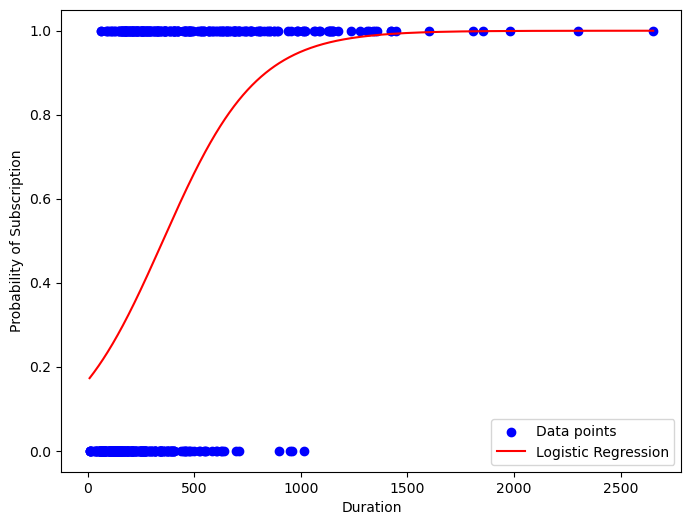

In [13]:
# Create a range of x values for the plot
x_values = np.linspace(x.min(), x.max(), 1000)  # Increase the number of points for a smoother curve

# Calculate the predicted probabilities for the x values
y_probabilities = model.predict_proba(x_values.reshape(-1, 1))[:, 1]

# Plot the logistic curve
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x_values, y_probabilities, color='red', label='Logistic Regression')
plt.xlabel('Duration')
plt.ylabel('Probability of Subscription')
plt.legend()
plt.show()

## Pseudo R-squared

In [14]:
# Define the independent variables (features) and the dependent variable (target)
X2 = data[['duration', 'interest_rate', 'credit', 'march', 'may', 'previous']]
y2 = data["y"]

# Add a constant term to the independent variables for the intercept
X2 = sm.add_constant(X2)

# Fit the logistic regression model
model2 = sm.Logit(y2, X2)
result = model2.fit()

# Calculate the Pseudo R-squared (McFadden R-squared)
# This is just one of several methods
pseudo_r2 = 1 - (result.llf / result.llnull)
print("Pseudo R-squared (McFadden):", pseudo_r2)



Optimization terminated successfully.
         Current function value: 0.335942
         Iterations 7
Pseudo R-squared (McFadden): 0.5153385192364679


## Pseudo R-squared

"Optimization terminated successfully": This message indicates that the optimization algorithm used to fit the logistic regression model has completed successfully without any issues. In other words, the model converged to a solution.

"Current function value: 0.335942": This value represents the value of the negative log-likelihood (the function that the logistic regression model is trying to minimize) at the estimated coefficients. The closer this value is to zero, the better the fit of the model to the data. In your case, the value is 0.335942, which is relatively low and indicates a reasonable fit.

"Iterations 7": This tells you the number of iterations it took for the optimization algorithm to converge to the solution. In this case, it took 7 iterations.

"Pseudo R-squared (McFadden): 0.5153385192364679": The Pseudo R-squared (McFadden) is a measure of the goodness of fit for logistic regression models. It's a measure of how well the model explains the variance in the data. A higher value indicates a better fit. In your case, the Pseudo R-squared is 0.5153, which suggests that the model is explaining a substantial portion of the variance in the data, indicating a reasonably good fit.

Overall, our logistic regression model seems to have converged successfully, and the Pseudo R-squared value of 0.5153 suggests that the model is doing a decent job of explaining the variability in the data.

## Visualize the performance of a binary classification model

These codes are used to evaluate and visualize the performance of a binary classification model, such as the logistic regression model. Let's break down each part:

##### Calculate Precision, Recall, and F1-Score:

These metrics are commonly used to assess the quality of a classification model, particularly in binary classification problems.

precision is a measure of how many of the model's positive predictions are actually correct.

recall (also called sensitivity) measures how many of the actual positive cases the model correctly identifies.

F1 Score is a balance between precision and recall, giving a single value that summarizes the model's performance.

The code calculates these metrics by comparing the model's predictions to the actual outcomes in the test set.

##### Calculate AUC-ROC (Area Under the Receiver Operating Characteristic Curve):

The AUC-ROC is a metric used to assess the model's ability to distinguish between the two classes (positive and negative) across different thresholds.

It measures the area under the ROC curve, which is a plot of the true positive rate (sensitivity) against the false positive rate at various thresholds.

The code calculates the AUC-ROC by comparing the actual outcomes in the test set to the predicted probabilities generated by the model.

A higher AUC-ROC indicates a better model.

#### Plot the ROC Curve:

The ROC curve visually illustrates the model's performance in distinguishing between the two classes.

It's a graph of the true positive rate (sensitivity) against the false positive rate at different thresholds.

The ROC curve is shown in dark orange, and a dashed line in navy represents a random or baseline model.

The plot provides a visual assessment of how well the model is doing, with the area under the curve (AUC) indicating its performance.

In summary, these codes provide a comprehensive evaluation of the binary classification model. They calculate and report key metrics (precision, recall, F1-score, AUC-ROC), which help us understand how well the model is performing. Additionally, the ROC curve visually represents the model's ability to distinguish between classes, and the AUC-ROC score quantifies its overall performance.


Precision: 0.8461538461538461
Recall: 0.5409836065573771
F1 Score: 0.66
AUC-ROC: 0.8515059092642013


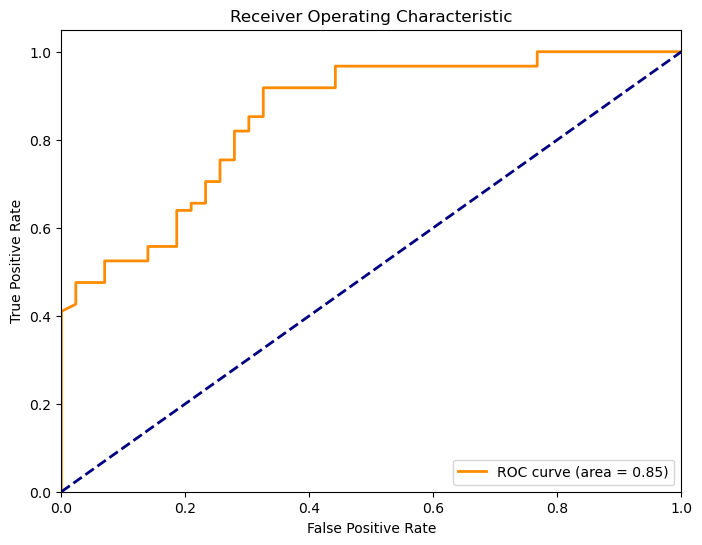

In [15]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test.values, predictions)
recall = recall_score(y_test.values, predictions)
f1 = f1_score(y_test.values, predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Calculate AUC-ROC
y_probabilities = model.predict_proba(x_test.values)[:, 1]
roc_auc = roc_auc_score(y_test.values, y_probabilities)
print("AUC-ROC:", roc_auc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test.values, y_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## Interpretation

#### What is the model used?

The model used in this project is a Logistic Regression model. Logistic regression is a type of statistical model used for binary classification, which means it predicts one of two possible outcomes (in this case, whether a client will subscribe to a term deposit or not).

#### What method is used?

The method used for this project is Logistic Regression. Logistic regression models the probability that a given input belongs to a particular class (in this case, whether a client will subscribe to a term deposit).

#### What is the value of Pseudo R-squared? What does it mean?

"Optimization terminated successfully": This message indicates that the optimization algorithm used to fit the logistic regression model has completed successfully without any issues. In other words, the model converged to a solution.

"Current function value: 0.335942": This value represents the value of the negative log-likelihood (the function that the logistic regression model is trying to minimize) at the estimated coefficients. The closer this value is to zero, the better the fit of the model to the data. In your case, the value is 0.335942, which is relatively low and indicates a reasonable fit.

"Iterations 7": This tells you the number of iterations it took for the optimization algorithm to converge to the solution. In this case, it took 7 iterations.

"Pseudo R-squared (McFadden): 0.5153385192364679": The Pseudo R-squared (McFadden) is a measure of the goodness of fit for logistic regression models. It's a measure of how well the model explains the variance in the data. A higher value indicates a better fit. In your case, the Pseudo R-squared is 0.5153, which suggests that the model is explaining a substantial portion of the variance in the data, indicating a reasonably good fit.

Overall, our logistic regression model seems to have converged successfully, and the Pseudo R-squared value of 0.5153 suggests that the model is doing a decent job of explaining the variability in the data.

The term "Pseudo R-squared" generally refers to measures of model fit in logistic regression, which are similar to R-squared in linear regression. However, the exact method to calculate it can vary, and it's not a standard output of logistic regression in scikit-learn.

Pseudo R-squared values are used to assess how well the model fits the data, with higher values indicating a better fit. They don't have a direct interpretation like R-squared in linear regression.

#### What is the coefficient of the duration variable, and what does it mean? 

The coefficient of the duration variable, represented as approximately 0.00455103, is a crucial component of a logistic regression model. It quantifies how the log-odds of a positive outcome, in this case, a client subscribing to a term deposit, change for a one-unit increase in the duration of the last contact while keeping other factors constant. Specifically, a positive coefficient indicates that as the duration of the last contact with the client increases, there is a corresponding increase in the likelihood of the client subscribing to a term deposit, while a negative coefficient would suggest the opposite effect. The coefficient essentially measures the strength and direction of the relationship between the duration and the likelihood of a positive outcome, making it a key factor in understanding the impact of duration on the prediction.
In essence, this coefficient quantifies the strength and direction of the relationship between duration and the probability of a positive outcome, providing valuable insight into the duration's influence on predictions.